<a href="https://colab.research.google.com/github/ANSR1226/AI-ML-Zone/blob/main/WindPowerGeneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importing necessary libraries
import kagglehub
import pandas as pd  # For tabular data organization
import numpy as np  # For numeric calculations
import matplotlib.pyplot as plt  # Correcting 'pld' to 'plt'
import seaborn as sns  # For statistical data visualization
from sklearn.model_selection import train_test_split  # For splitting datasets into train and test sets
from sklearn.preprocessing import StandardScaler  # Correcting 'StandardScalar' to 'StandardScaler'
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating model performance
import xgboost as xgb  # For Extreme Gradient Boosting

Importing the dataset

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("berkerisen/wind-turbine-scada-dataset")

print("Path to dataset files:", path)


100%|██████████| 1.50M/1.50M [00:00<00:00, 76.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/berkerisen/wind-turbine-scada-dataset/versions/3


In [13]:
df=pd.read_csv(f"{path}/T1.csv")
df.head()
df.info()
df.describe()
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


,0
Date/Time,0
LV ActivePower (kW),0
Wind Speed (m/s),0
Theoretical_Power_Curve (KWh),0
Wind Direction (°),0


In [15]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%d %m %Y %H:%M', errors = 'coerce')
df = df.dropna()

Plotting and visualize

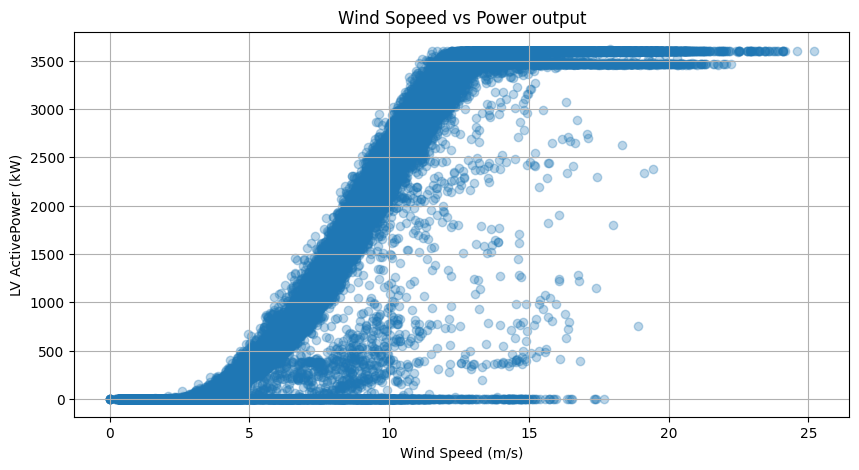

In [16]:
plt.figure(figsize=(10,5))
plt.scatter(df['Wind Speed (m/s)'], df['LV ActivePower (kW)'], alpha=0.3)
plt.xlabel ('Wind Speed (m/s)')
plt.ylabel('LV ActivePower (kW)')
plt.title('Wind Sopeed vs Power output')
plt.grid(True)
plt.show()

In [26]:
features = ['Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)' if 'Wind Direction (°)' in df.columns else 'Wind Direction'] #use the original column name without the degree symbol
target = 'LV ActivePower (kW)'
x=df[features]
y=df[target]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)


In [27]:
model = xgb.XGBRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

RMSE: 397.47286234181223
R2 Score: 0.9074116013046678


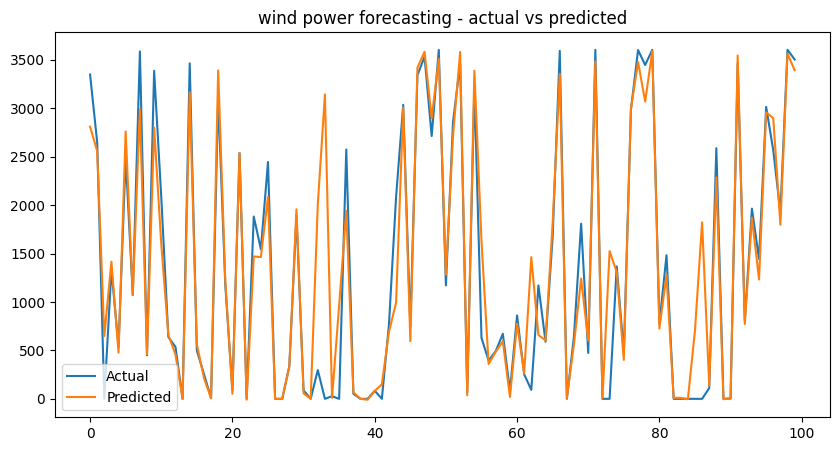

In [28]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred[:100], label = 'Predicted')
plt.legend()
plt.title('wind power forecasting - actual vs predicted')
plt.show()
